In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("weather.csv")

In [3]:
df.head()

,city,datetime,humidity,pressure,temperature,wind_direction,wind_speed
0,Vancouver,2012-10-02,77.375000,966.769231,286.145190,209.500000,0.000000
1,Vancouver,2012-10-03,71.625000,1010.000000,285.528125,162.916667,0.541667
2,Vancouver,2012-10-04,49.000000,1019.833333,284.373333,87.166667,0.625000
3,Vancouver,2012-10-05,43.409091,1015.500000,283.757292,147.916667,0.416667
4,Vancouver,2012-10-06,43.166667,1015.842105,284.825833,125.708333,0.375000


In [4]:
#getting info about columns

weatherAttributes = ['humidity','pressure','temperature','wind_direction','wind_speed'] 
for weatherAttribute in weatherAttributes:
    print(weatherAttribute, df[weatherAttribute].value_counts())

humidity 100.000000    744
83.000000     123
74.000000     106
67.583333      94
71.416667      93
             ... 
64.363636       1
17.714286       1
89.444444       1
36.136364       1
78.260870       1
Name: humidity, Length: 5637, dtype: int64
pressure 1013.000000    326
1016.000000    170
1015.208333    170
1015.125000    168
1015.958333    167
              ... 
987.578947       1
1005.647059      1
1020.318182      1
1038.222222      1
1024.956522      1
Name: pressure, Length: 3350, dtype: int64
temperature 282.247000    75
283.318000    63
290.588000    39
293.213000    39
292.223750     6
              ..
290.834900     1
293.583750     1
271.672500     1
307.123333     1
304.055833     1
Name: temperature, Length: 61600, dtype: int64
wind_direction 66.000000     80
68.000000     70
185.000000    56
172.916667    54
177.500000    52
              ..
333.791667     1
315.625000     1
44.000000      1
46.083333      1
314.791667     1
Name: wind_direction, Length: 7491, dtype

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67538 entries, 0 to 67537
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            67538 non-null  object 
 1   datetime        67538 non-null  object 
 2   humidity        67538 non-null  float64
 3   pressure        67538 non-null  float64
 4   temperature     67538 non-null  float64
 5   wind_direction  67538 non-null  float64
 6   wind_speed      67538 non-null  float64
dtypes: float64(5), object(2)
memory usage: 3.6+ MB


In [6]:
#convert datetime back into datetime

df["datetime"] = pd.to_datetime(df["datetime"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67538 entries, 0 to 67537
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   city            67538 non-null  object        
 1   datetime        67538 non-null  datetime64[ns]
 2   humidity        67538 non-null  float64       
 3   pressure        67538 non-null  float64       
 4   temperature     67538 non-null  float64       
 5   wind_direction  67538 non-null  float64       
 6   wind_speed      67538 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 3.6+ MB


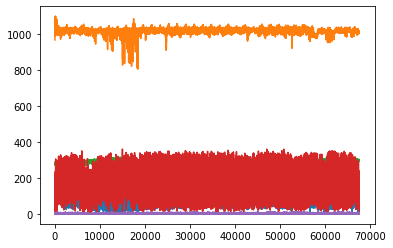

In [8]:
for weatherAttribute in weatherAttributes:
    df[weatherAttribute].plot()

In [9]:
##predicting temperature
df["target"] = df.shift(-1)["temperature"]

In [10]:
df

,city,datetime,humidity,pressure,temperature,wind_direction,wind_speed,target
0,Vancouver,2012-10-02,77.375000,966.769231,286.145190,209.500000,0.000000,285.528125
1,Vancouver,2012-10-03,71.625000,1010.000000,285.528125,162.916667,0.541667,284.373333
2,Vancouver,2012-10-04,49.000000,1019.833333,284.373333,87.166667,0.625000,283.757292
3,Vancouver,2012-10-05,43.409091,1015.500000,283.757292,147.916667,0.416667,284.825833
4,Vancouver,2012-10-06,43.166667,1015.842105,284.825833,125.708333,0.375000,285.595833
...,...,...,...,...,...,...,...,...
67533,Jerusalem,2017-10-24,63.250000,1012.500000,295.406667,112.500000,1.875000,295.434583
67534,Jerusalem,2017-10-25,58.875000,1016.041667,295.434583,118.750000,2.208333,296.457083
67535,Jerusalem,2017-10-26,51.458333,1015.625000,296.457083,126.250000,2.541667,295.814583
67536,Jerusalem,2017-10-27,52.833333,1011.916667,295.814583,105.416667,1.875000,294.150000


In [11]:
df = df[:-1]

In [12]:
df

,city,datetime,humidity,pressure,temperature,wind_direction,wind_speed,target
0,Vancouver,2012-10-02,77.375000,966.769231,286.145190,209.500000,0.000000,285.528125
1,Vancouver,2012-10-03,71.625000,1010.000000,285.528125,162.916667,0.541667,284.373333
2,Vancouver,2012-10-04,49.000000,1019.833333,284.373333,87.166667,0.625000,283.757292
3,Vancouver,2012-10-05,43.409091,1015.500000,283.757292,147.916667,0.416667,284.825833
4,Vancouver,2012-10-06,43.166667,1015.842105,284.825833,125.708333,0.375000,285.595833
...,...,...,...,...,...,...,...,...
67532,Jerusalem,2017-10-23,61.666667,1011.958333,295.540833,111.250000,1.958333,295.406667
67533,Jerusalem,2017-10-24,63.250000,1012.500000,295.406667,112.500000,1.875000,295.434583
67534,Jerusalem,2017-10-25,58.875000,1016.041667,295.434583,118.750000,2.208333,296.457083
67535,Jerusalem,2017-10-26,51.458333,1015.625000,296.457083,126.250000,2.541667,295.814583


In [13]:
# in specific city 
city_df = df.loc[df['city'] == 'Vancouver']

In [14]:
city_df

,city,datetime,humidity,pressure,temperature,wind_direction,wind_speed,target
0,Vancouver,2012-10-02,77.375000,966.769231,286.145190,209.500000,0.000000,285.528125
1,Vancouver,2012-10-03,71.625000,1010.000000,285.528125,162.916667,0.541667,284.373333
2,Vancouver,2012-10-04,49.000000,1019.833333,284.373333,87.166667,0.625000,283.757292
3,Vancouver,2012-10-05,43.409091,1015.500000,283.757292,147.916667,0.416667,284.825833
4,Vancouver,2012-10-06,43.166667,1015.842105,284.825833,125.708333,0.375000,285.595833
...,...,...,...,...,...,...,...,...
1802,Vancouver,2017-10-24,84.208333,1035.458333,283.835417,139.333333,1.708333,283.138333
1803,Vancouver,2017-10-25,92.583333,1021.166667,283.138333,156.583333,2.666667,283.408333
1804,Vancouver,2017-10-26,93.208333,1024.166667,283.408333,310.958333,3.166667,283.085417
1805,Vancouver,2017-10-27,93.583333,1024.291667,283.085417,281.291667,2.125000,288.010000


In [15]:
city_df = city_df.iloc[:, 1:]

In [16]:
city_df

,datetime,humidity,pressure,temperature,wind_direction,wind_speed,target
0,2012-10-02,77.375000,966.769231,286.145190,209.500000,0.000000,285.528125
1,2012-10-03,71.625000,1010.000000,285.528125,162.916667,0.541667,284.373333
2,2012-10-04,49.000000,1019.833333,284.373333,87.166667,0.625000,283.757292
3,2012-10-05,43.409091,1015.500000,283.757292,147.916667,0.416667,284.825833
4,2012-10-06,43.166667,1015.842105,284.825833,125.708333,0.375000,285.595833
...,...,...,...,...,...,...,...
1802,2017-10-24,84.208333,1035.458333,283.835417,139.333333,1.708333,283.138333
1803,2017-10-25,92.583333,1021.166667,283.138333,156.583333,2.666667,283.408333
1804,2017-10-26,93.208333,1024.166667,283.408333,310.958333,3.166667,283.085417
1805,2017-10-27,93.583333,1024.291667,283.085417,281.291667,2.125000,288.010000


In [17]:
#attempting to predict based on humidity, pressure, wind_direction, wind_speed
from sklearn.linear_model import Ridge

In [18]:
reg = Ridge(alpha=.1)

In [19]:
predictors = ["humidity","pressure","wind_direction","wind_speed"]

features = city_df[predictors]

features

,humidity,pressure,wind_direction,wind_speed
0,77.375000,966.769231,209.500000,0.000000
1,71.625000,1010.000000,162.916667,0.541667
2,49.000000,1019.833333,87.166667,0.625000
3,43.409091,1015.500000,147.916667,0.416667
4,43.166667,1015.842105,125.708333,0.375000
...,...,...,...,...
1802,84.208333,1035.458333,139.333333,1.708333
1803,92.583333,1021.166667,156.583333,2.666667
1804,93.208333,1024.166667,310.958333,3.166667
1805,93.583333,1024.291667,281.291667,2.125000


In [20]:
target = city_df["temperature"]

target

0       286.145190
1       285.528125
2       284.373333
3       283.757292
4       284.825833
           ...    
1802    283.835417
1803    283.138333
1804    283.408333
1805    283.085417
1806    288.010000
Name: temperature, Length: 1807, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split



In [22]:
X_train, X_test, y_train, y_test = train_test_split(features,target, train_size=0.8,random_state=0)
print("Training size: ", len(X_train), " Test size: ", len(X_test))

Training size:  1445  Test size:  362


In [23]:
reg.fit(X_train,y_train)

Ridge(alpha=0.1)

In [24]:
predictions = reg.predict(X_test)

In [25]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,predictions)

4.258767229755089

In [26]:
combined = pd.concat([y_test, pd.Series(predictions, index=y_test.index)], axis=1)
combined.columns = ["actual","predictions"]

In [27]:
combined

,actual,predictions
1713,290.894167,283.910602
1142,270.466522,279.859453
1738,291.032500,284.875516
542,290.832208,288.847831
1305,284.654583,286.060199
...,...,...
171,287.823333,287.729473
686,287.776250,283.482087
1440,283.549125,280.521272
1524,278.283750,283.853525


<AxesSubplot:>

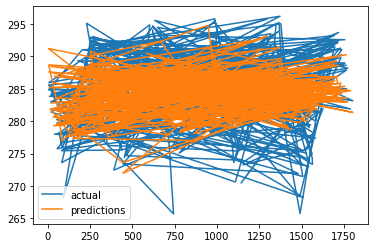

In [28]:
combined.plot()

In [29]:
reg.coef_

array([-0.19148724, -0.10199886,  0.03888734, -0.45156631])

In [30]:
#create predictions function

def create_predictions(predictors,target_col, df,reg):
    features = city_df[predictors]
    target = city_df[target_col]
    X_train, X_test, y_train, y_test = train_test_split(features,target, train_size=0.8,random_state=0)
    reg.fit(X_train,y_train)
    predictions = reg.predict(X_test)
    error = mean_absolute_error(y_test,predictions)
    combined = pd.concat([y_test, pd.Series(predictions, index=y_test.index)], axis=1)
    combined.columns = ["actual","predictions"]
    return error,combined
    

In [31]:
#attempting to predict based on past temperature
city_df["month_temp"] = city_df["temperature"].rolling(30).mean()

In [32]:
city_df

,datetime,humidity,pressure,temperature,wind_direction,wind_speed,target,month_temp
0,2012-10-02,77.375000,966.769231,286.145190,209.500000,0.000000,285.528125,NaN
1,2012-10-03,71.625000,1010.000000,285.528125,162.916667,0.541667,284.373333,NaN
2,2012-10-04,49.000000,1019.833333,284.373333,87.166667,0.625000,283.757292,NaN
3,2012-10-05,43.409091,1015.500000,283.757292,147.916667,0.416667,284.825833,NaN
4,2012-10-06,43.166667,1015.842105,284.825833,125.708333,0.375000,285.595833,NaN
...,...,...,...,...,...,...,...,...
1802,2017-10-24,84.208333,1035.458333,283.835417,139.333333,1.708333,283.138333,284.425207
1803,2017-10-25,92.583333,1021.166667,283.138333,156.583333,2.666667,283.408333,284.258138
1804,2017-10-26,93.208333,1024.166667,283.408333,310.958333,3.166667,283.085417,284.097502
1805,2017-10-27,93.583333,1024.291667,283.085417,281.291667,2.125000,288.010000,283.925988


In [33]:
city_df["month_day_temp"] = city_df["month_temp"] / city_df["temperature"]

In [34]:
city_df

,datetime,humidity,pressure,temperature,wind_direction,wind_speed,target,month_temp,month_day_temp
0,2012-10-02,77.375000,966.769231,286.145190,209.500000,0.000000,285.528125,NaN,NaN
1,2012-10-03,71.625000,1010.000000,285.528125,162.916667,0.541667,284.373333,NaN,NaN
2,2012-10-04,49.000000,1019.833333,284.373333,87.166667,0.625000,283.757292,NaN,NaN
3,2012-10-05,43.409091,1015.500000,283.757292,147.916667,0.416667,284.825833,NaN,NaN
4,2012-10-06,43.166667,1015.842105,284.825833,125.708333,0.375000,285.595833,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1802,2017-10-24,84.208333,1035.458333,283.835417,139.333333,1.708333,283.138333,284.425207,1.002078
1803,2017-10-25,92.583333,1021.166667,283.138333,156.583333,2.666667,283.408333,284.258138,1.003955
1804,2017-10-26,93.208333,1024.166667,283.408333,310.958333,3.166667,283.085417,284.097502,1.002432
1805,2017-10-27,93.583333,1024.291667,283.085417,281.291667,2.125000,288.010000,283.925988,1.002969


In [35]:
predictors = ["humidity","pressure","wind_direction","wind_speed","month_temp","month_day_temp"]

In [36]:
city_df = city_df.iloc[30:,:].copy()

In [37]:
error, combined = create_predictions(predictors,"temperature", city_df,reg)

In [38]:
error

0.863050847529359

<AxesSubplot:>

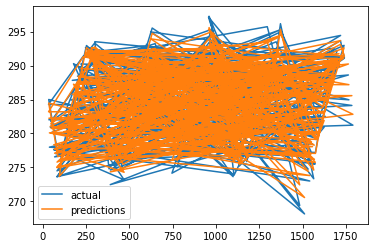

In [39]:
combined.plot()

In [40]:
city_df['month'] = pd.to_datetime(city_df['datetime']).dt.month

city_df['day_of_year'] = pd.to_datetime(city_df['datetime']).dt.day_of_year

In [41]:
city_df

,datetime,humidity,pressure,temperature,wind_direction,wind_speed,target,month_temp,month_day_temp,month,day_of_year
30,2012-11-01,93.052632,1005.647059,283.903750,72.791667,3.125000,284.260417,283.198799,0.997517,11,306
31,2012-11-02,88.937500,1009.071429,284.260417,96.666667,3.333333,284.615000,283.156542,0.996117,11,307
32,2012-11-03,87.800000,1011.631579,284.615000,103.833333,3.333333,284.394167,283.164597,0.994904,11,308
33,2012-11-04,87.523810,1007.750000,284.394167,93.750000,3.458333,284.288333,283.185826,0.995751,11,309
34,2012-11-05,92.133333,1017.812500,284.288333,93.416667,2.708333,285.003750,283.167910,0.996059,11,310
...,...,...,...,...,...,...,...,...,...,...,...
1802,2017-10-24,84.208333,1035.458333,283.835417,139.333333,1.708333,283.138333,284.425207,1.002078,10,297
1803,2017-10-25,92.583333,1021.166667,283.138333,156.583333,2.666667,283.408333,284.258138,1.003955,10,298
1804,2017-10-26,93.208333,1024.166667,283.408333,310.958333,3.166667,283.085417,284.097502,1.002432,10,299
1805,2017-10-27,93.583333,1024.291667,283.085417,281.291667,2.125000,288.010000,283.925988,1.002969,10,300


In [42]:
city_df["monthly_avg"] = city_df["temperature"].groupby(city_df['month']).apply(lambda x: x.expanding(1).mean())

city_df["day_of_year_avg"] = city_df["temperature"].groupby(city_df['day_of_year']).apply(lambda x: x.expanding(1).mean())

In [43]:
city_df

,datetime,humidity,pressure,temperature,wind_direction,wind_speed,target,month_temp,month_day_temp,month,day_of_year,monthly_avg,day_of_year_avg
30,2012-11-01,93.052632,1005.647059,283.903750,72.791667,3.125000,284.260417,283.198799,0.997517,11,306,283.903750,283.903750
31,2012-11-02,88.937500,1009.071429,284.260417,96.666667,3.333333,284.615000,283.156542,0.996117,11,307,284.082083,284.260417
32,2012-11-03,87.800000,1011.631579,284.615000,103.833333,3.333333,284.394167,283.164597,0.994904,11,308,284.259722,284.615000
33,2012-11-04,87.523810,1007.750000,284.394167,93.750000,3.458333,284.288333,283.185826,0.995751,11,309,284.293333,284.394167
34,2012-11-05,92.133333,1017.812500,284.288333,93.416667,2.708333,285.003750,283.167910,0.996059,11,310,284.292333,284.288333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802,2017-10-24,84.208333,1035.458333,283.835417,139.333333,1.708333,283.138333,284.425207,1.002078,10,297,283.887428,282.460021
1803,2017-10-25,92.583333,1021.166667,283.138333,156.583333,2.666667,283.408333,284.258138,1.003955,10,298,283.882401,283.027869
1804,2017-10-26,93.208333,1024.166667,283.408333,310.958333,3.166667,283.085417,284.097502,1.002432,10,299,283.879240,283.545154
1805,2017-10-27,93.583333,1024.291667,283.085417,281.291667,2.125000,288.010000,283.925988,1.002969,10,300,283.873983,282.883523


In [44]:
predictors = ["humidity","pressure","wind_direction","wind_speed","month_temp","month_day_temp","day_of_year_avg","monthly_avg","month","day_of_year"]


In [45]:
error, combined = create_predictions(predictors,"temperature", city_df,reg)


In [46]:
error

0.783377194097226

<AxesSubplot:>

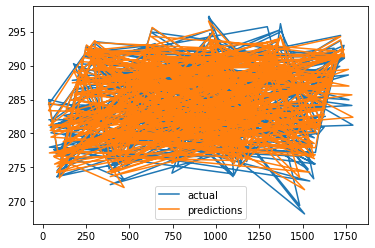

In [47]:
combined.plot()

In [48]:
reg.coef_

array([ 3.82825443e-03, -7.26276827e-03,  4.03596364e-03,  4.12384094e-02,
        5.80162689e-01, -1.00487034e+02,  6.70747650e-01, -2.32115060e-01,
       -3.54988691e-01,  8.81252931e-03])

In [49]:
city_df.corr()["target"]

humidity          -0.368597
pressure          -0.128830
temperature        0.968432
wind_direction     0.385250
wind_speed        -0.052445
target             1.000000
month_temp         0.885123
month_day_temp    -0.334700
month              0.130125
day_of_year        0.127410
monthly_avg        0.899617
day_of_year_avg    0.938508
Name: target, dtype: float64

In [50]:
predictors = ["month_temp","month_day_temp","day_of_year_avg","monthly_avg","month","day_of_year"]
error, combined = create_predictions(predictors,"temperature", city_df,reg)

In [51]:
error

0.7794037946560407

<AxesSubplot:>

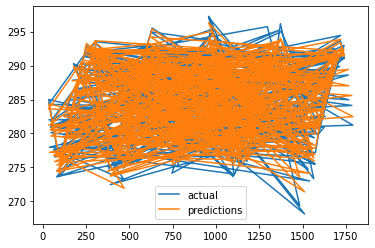

In [52]:
combined.plot()

<AxesSubplot:>

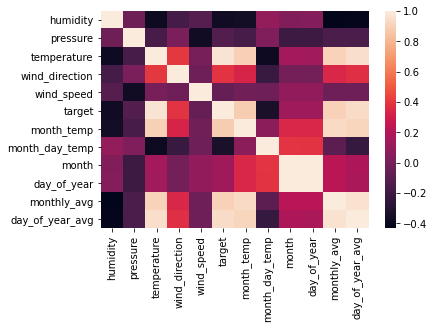

In [53]:
import seaborn as sns
corr = city_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [54]:
predictors = ["month_day_temp","month_temp","day_of_year_avg","monthly_avg"]
error, combined = create_predictions(predictors,"temperature", city_df,reg)

In [55]:
error

0.748827035640412

In [56]:
city_df['year'] = pd.to_datetime(city_df['datetime']).dt.year

In [57]:
city_df

,datetime,humidity,pressure,temperature,wind_direction,wind_speed,target,month_temp,month_day_temp,month,day_of_year,monthly_avg,day_of_year_avg,year
30,2012-11-01,93.052632,1005.647059,283.903750,72.791667,3.125000,284.260417,283.198799,0.997517,11,306,283.903750,283.903750,2012
31,2012-11-02,88.937500,1009.071429,284.260417,96.666667,3.333333,284.615000,283.156542,0.996117,11,307,284.082083,284.260417,2012
32,2012-11-03,87.800000,1011.631579,284.615000,103.833333,3.333333,284.394167,283.164597,0.994904,11,308,284.259722,284.615000,2012
33,2012-11-04,87.523810,1007.750000,284.394167,93.750000,3.458333,284.288333,283.185826,0.995751,11,309,284.293333,284.394167,2012
34,2012-11-05,92.133333,1017.812500,284.288333,93.416667,2.708333,285.003750,283.167910,0.996059,11,310,284.292333,284.288333,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802,2017-10-24,84.208333,1035.458333,283.835417,139.333333,1.708333,283.138333,284.425207,1.002078,10,297,283.887428,282.460021,2017
1803,2017-10-25,92.583333,1021.166667,283.138333,156.583333,2.666667,283.408333,284.258138,1.003955,10,298,283.882401,283.027869,2017
1804,2017-10-26,93.208333,1024.166667,283.408333,310.958333,3.166667,283.085417,284.097502,1.002432,10,299,283.879240,283.545154,2017
1805,2017-10-27,93.583333,1024.291667,283.085417,281.291667,2.125000,288.010000,283.925988,1.002969,10,300,283.873983,282.883523,2017


In [58]:
city_df["yearly_avg"] = city_df["temperature"].groupby(city_df['year']).apply(lambda x: x.expanding(1).mean())

In [59]:
city_df

,datetime,humidity,pressure,temperature,wind_direction,wind_speed,target,month_temp,month_day_temp,month,day_of_year,monthly_avg,day_of_year_avg,year,yearly_avg
30,2012-11-01,93.052632,1005.647059,283.903750,72.791667,3.125000,284.260417,283.198799,0.997517,11,306,283.903750,283.903750,2012,283.903750
31,2012-11-02,88.937500,1009.071429,284.260417,96.666667,3.333333,284.615000,283.156542,0.996117,11,307,284.082083,284.260417,2012,284.082083
32,2012-11-03,87.800000,1011.631579,284.615000,103.833333,3.333333,284.394167,283.164597,0.994904,11,308,284.259722,284.615000,2012,284.259722
33,2012-11-04,87.523810,1007.750000,284.394167,93.750000,3.458333,284.288333,283.185826,0.995751,11,309,284.293333,284.394167,2012,284.293333
34,2012-11-05,92.133333,1017.812500,284.288333,93.416667,2.708333,285.003750,283.167910,0.996059,11,310,284.292333,284.288333,2012,284.292333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802,2017-10-24,84.208333,1035.458333,283.835417,139.333333,1.708333,283.138333,284.425207,1.002078,10,297,283.887428,282.460021,2017,284.257696
1803,2017-10-25,92.583333,1021.166667,283.138333,156.583333,2.666667,283.408333,284.258138,1.003955,10,298,283.882401,283.027869,2017,284.253940
1804,2017-10-26,93.208333,1024.166667,283.408333,310.958333,3.166667,283.085417,284.097502,1.002432,10,299,283.879240,283.545154,2017,284.251112
1805,2017-10-27,93.583333,1024.291667,283.085417,281.291667,2.125000,288.010000,283.925988,1.002969,10,300,283.873983,282.883523,2017,284.247226


In [60]:
city_df.iloc[0]

datetime           2012-11-01 00:00:00
humidity                     93.052632
pressure                   1005.647059
temperature                  283.90375
wind_direction               72.791667
wind_speed                       3.125
target                      284.260417
month_temp                  283.198799
month_day_temp                0.997517
month                               11
day_of_year                        306
monthly_avg                  283.90375
day_of_year_avg              283.90375
year                              2012
yearly_avg                   283.90375
Name: 30, dtype: object

In [61]:
city_df["yearly_avg"] = city_df.groupby(city_df.datetime.dt.year)['temperature'].transform('mean')

In [62]:
city_df

,datetime,humidity,pressure,temperature,wind_direction,wind_speed,target,month_temp,month_day_temp,month,day_of_year,monthly_avg,day_of_year_avg,year,yearly_avg
30,2012-11-01,93.052632,1005.647059,283.903750,72.791667,3.125000,284.260417,283.198799,0.997517,11,306,283.903750,283.903750,2012,279.331900
31,2012-11-02,88.937500,1009.071429,284.260417,96.666667,3.333333,284.615000,283.156542,0.996117,11,307,284.082083,284.260417,2012,279.331900
32,2012-11-03,87.800000,1011.631579,284.615000,103.833333,3.333333,284.394167,283.164597,0.994904,11,308,284.259722,284.615000,2012,279.331900
33,2012-11-04,87.523810,1007.750000,284.394167,93.750000,3.458333,284.288333,283.185826,0.995751,11,309,284.293333,284.394167,2012,279.331900
34,2012-11-05,92.133333,1017.812500,284.288333,93.416667,2.708333,285.003750,283.167910,0.996059,11,310,284.292333,284.288333,2012,279.331900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802,2017-10-24,84.208333,1035.458333,283.835417,139.333333,1.708333,283.138333,284.425207,1.002078,10,297,283.887428,282.460021,2017,284.259727
1803,2017-10-25,92.583333,1021.166667,283.138333,156.583333,2.666667,283.408333,284.258138,1.003955,10,298,283.882401,283.027869,2017,284.259727
1804,2017-10-26,93.208333,1024.166667,283.408333,310.958333,3.166667,283.085417,284.097502,1.002432,10,299,283.879240,283.545154,2017,284.259727
1805,2017-10-27,93.583333,1024.291667,283.085417,281.291667,2.125000,288.010000,283.925988,1.002969,10,300,283.873983,282.883523,2017,284.259727


In [63]:
city_df["monthly_avg"] = city_df.groupby(city_df.datetime.dt.month)['temperature'].transform('mean')

In [64]:
city_df.head(30)

,datetime,humidity,pressure,temperature,wind_direction,wind_speed,target,month_temp,month_day_temp,month,day_of_year,monthly_avg,day_of_year_avg,year,yearly_avg
30,2012-11-01,93.052632,1005.647059,283.903750,72.791667,3.125000,284.260417,283.198799,0.997517,11,306,279.395948,283.903750,2012,279.3319
31,2012-11-02,88.937500,1009.071429,284.260417,96.666667,3.333333,284.615000,283.156542,0.996117,11,307,279.395948,284.260417,2012,279.3319
32,2012-11-03,87.800000,1011.631579,284.615000,103.833333,3.333333,284.394167,283.164597,0.994904,11,308,279.395948,284.615000,2012,279.3319
33,2012-11-04,87.523810,1007.750000,284.394167,93.750000,3.458333,284.288333,283.185826,0.995751,11,309,279.395948,284.394167,2012,279.3319
34,2012-11-05,92.133333,1017.812500,284.288333,93.416667,2.708333,285.003750,283.167910,0.996059,11,310,279.395948,284.288333,2012,279.3319
35,2012-11-06,86.041667,1016.833333,285.003750,210.166667,2.750000,282.020000,283.148174,0.993489,11,311,279.395948,285.003750,2012,279.3319
36,2012-11-07,90.545455,1019.300000,282.020000,142.500000,1.541667,281.817083,283.017396,1.003537,11,312,279.395948,282.020000,2012,279.3319
37,2012-11-08,76.434783,1016.095238,281.817083,197.500000,4.083333,279.107083,282.879389,1.003769,11,313,279.395948,281.817083,2012,279.3319
38,2012-11-09,78.913043,1014.095238,279.107083,144.583333,3.750000,277.982500,282.685826,1.012822,11,314,279.395948,279.107083,2012,279.3319
39,2012-11-10,64.272727,1011.913043,277.982500,123.750000,1.583333,276.994167,282.490951,1.016218,11,315,279.395948,277.982500,2012,279.3319


In [65]:

city_df["day_of_year_avg"] = city_df.groupby(city_df.datetime.dt.day_of_year)['temperature'].transform('mean')

In [66]:
city_df

,datetime,humidity,pressure,temperature,wind_direction,wind_speed,target,month_temp,month_day_temp,month,day_of_year,monthly_avg,day_of_year_avg,year,yearly_avg
30,2012-11-01,93.052632,1005.647059,283.903750,72.791667,3.125000,284.260417,283.198799,0.997517,11,306,279.395948,281.808595,2012,279.331900
31,2012-11-02,88.937500,1009.071429,284.260417,96.666667,3.333333,284.615000,283.156542,0.996117,11,307,279.395948,281.156483,2012,279.331900
32,2012-11-03,87.800000,1011.631579,284.615000,103.833333,3.333333,284.394167,283.164597,0.994904,11,308,279.395948,281.098550,2012,279.331900
33,2012-11-04,87.523810,1007.750000,284.394167,93.750000,3.458333,284.288333,283.185826,0.995751,11,309,279.395948,281.221426,2012,279.331900
34,2012-11-05,92.133333,1017.812500,284.288333,93.416667,2.708333,285.003750,283.167910,0.996059,11,310,279.395948,282.468315,2012,279.331900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802,2017-10-24,84.208333,1035.458333,283.835417,139.333333,1.708333,283.138333,284.425207,1.002078,10,297,283.901194,282.460021,2017,284.259727
1803,2017-10-25,92.583333,1021.166667,283.138333,156.583333,2.666667,283.408333,284.258138,1.003955,10,298,283.901194,283.027869,2017,284.259727
1804,2017-10-26,93.208333,1024.166667,283.408333,310.958333,3.166667,283.085417,284.097502,1.002432,10,299,283.901194,283.545154,2017,284.259727
1805,2017-10-27,93.583333,1024.291667,283.085417,281.291667,2.125000,288.010000,283.925988,1.002969,10,300,283.901194,282.883523,2017,284.259727


In [67]:

#city_df.iloc[0]["yearly_avg"]

city_df["yearly_trend"] = city_df["yearly_avg"] / city_df.iloc[0]["yearly_avg"]

In [68]:
city_df

,datetime,humidity,pressure,temperature,wind_direction,wind_speed,target,month_temp,month_day_temp,month,day_of_year,monthly_avg,day_of_year_avg,year,yearly_avg,yearly_trend
30,2012-11-01,93.052632,1005.647059,283.903750,72.791667,3.125000,284.260417,283.198799,0.997517,11,306,279.395948,281.808595,2012,279.331900,1.000000
31,2012-11-02,88.937500,1009.071429,284.260417,96.666667,3.333333,284.615000,283.156542,0.996117,11,307,279.395948,281.156483,2012,279.331900,1.000000
32,2012-11-03,87.800000,1011.631579,284.615000,103.833333,3.333333,284.394167,283.164597,0.994904,11,308,279.395948,281.098550,2012,279.331900,1.000000
33,2012-11-04,87.523810,1007.750000,284.394167,93.750000,3.458333,284.288333,283.185826,0.995751,11,309,279.395948,281.221426,2012,279.331900,1.000000
34,2012-11-05,92.133333,1017.812500,284.288333,93.416667,2.708333,285.003750,283.167910,0.996059,11,310,279.395948,282.468315,2012,279.331900,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802,2017-10-24,84.208333,1035.458333,283.835417,139.333333,1.708333,283.138333,284.425207,1.002078,10,297,283.901194,282.460021,2017,284.259727,1.017641
1803,2017-10-25,92.583333,1021.166667,283.138333,156.583333,2.666667,283.408333,284.258138,1.003955,10,298,283.901194,283.027869,2017,284.259727,1.017641
1804,2017-10-26,93.208333,1024.166667,283.408333,310.958333,3.166667,283.085417,284.097502,1.002432,10,299,283.901194,283.545154,2017,284.259727,1.017641
1805,2017-10-27,93.583333,1024.291667,283.085417,281.291667,2.125000,288.010000,283.925988,1.002969,10,300,283.901194,282.883523,2017,284.259727,1.017641


In [69]:
predictors = ["month_day_temp","month_temp","day_of_year_avg","monthly_avg"]
error, combined = create_predictions(predictors,"temperature", city_df,reg)

In [70]:
error

0.8516621337322265

In [71]:
predictors = ["day_of_year_avg","monthly_avg"]
error, combined = create_predictions(predictors,"temperature", city_df,reg)

In [72]:
error

1.6990965219899483

In [73]:
predictors = ["day_of_year_avg","monthly_avg", "yearly_avg","yearly_trend"]
error, combined = create_predictions(predictors,"temperature", city_df,reg)

In [74]:
error

1.680631398338559

<AxesSubplot:>

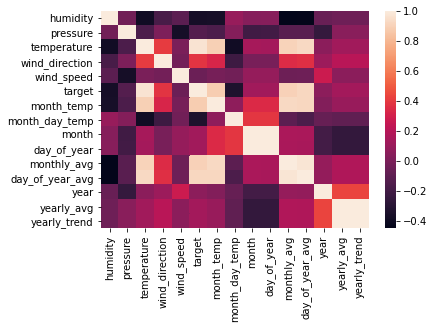

In [75]:
import seaborn as sns
corr = city_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

<AxesSubplot:>

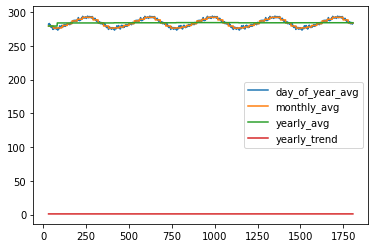

In [76]:
city_df[predictors].plot()

<AxesSubplot:>

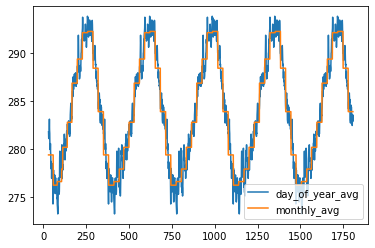

In [77]:
predictors = ["day_of_year_avg","monthly_avg"]

city_df[predictors].plot()

<AxesSubplot:>

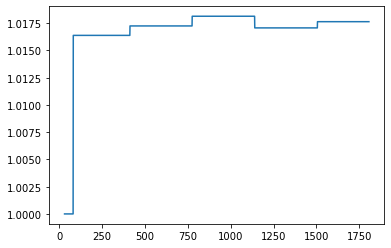

In [78]:

city_df["yearly_trend"].plot()

In [79]:
city_df["yearly_trend"] = (city_df["yearly_trend"] - 1) * 100

<AxesSubplot:>

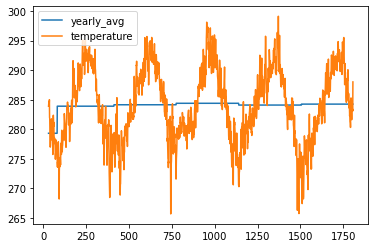

In [80]:
city_df[["yearly_avg", "temperature"]].plot()

<AxesSubplot:>

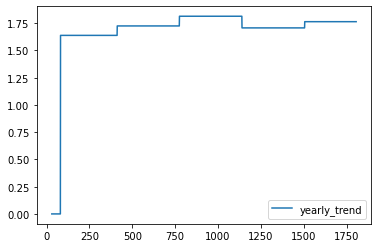

In [81]:
city_df[["yearly_trend"]].plot()

In [82]:
predictors = ["day_of_year_avg","monthly_avg", "yearly_avg","yearly_trend"]
error, combined = create_predictions(predictors,"temperature", city_df,reg)

In [83]:
error

1.6806312321931844

<AxesSubplot:>

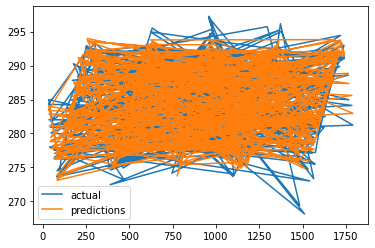

In [84]:
combined.plot()

In [85]:
def create_predictions(predictors,target_col, df,reg,res_index):
    features = df[predictors]
    target = df[target_col]
    X_train, X_test, y_train, y_test = train_test_split(features,target, train_size=0.8,random_state=0)
    reg.fit(X_train,y_train)
    predictions = reg.predict(X_test)
    error = mean_absolute_error(y_test,predictions)
    combined = pd.concat([y_test, pd.Series(predictions, index=y_test.index)], axis=1)
    combined.columns = ["actual","predictions"]
    res_pred = df.iloc[res_index]
    res_pred = reg.predict(df[predictors].iloc[res_index:])
    return error,combined, res_pred[0]
    

In [105]:
def pred_temp(df, city, preddate,target):
    curr_df = df.loc[df['city'] == 'Vancouver']
    
    
    curr_df["yearly_avg"] = curr_df.groupby(curr_df.datetime.dt.year)[target].transform('mean')
    curr_df["monthly_avg"] = curr_df.groupby(curr_df.datetime.dt.month)[target].transform('mean')
    curr_df["day_of_year_avg"] = curr_df.groupby(curr_df.datetime.dt.day_of_year)[target].transform('mean')
    curr_df["yearly_trend"] = curr_df["yearly_avg"] / curr_df.iloc[0]["yearly_avg"]
    
    preddate_monthly_avg  = curr_df.loc[curr_df['datetime'].dt.month == preddate.month]['monthly_avg'].iloc[0]
    preddate_doy_avg  = curr_df.loc[curr_df['datetime'].dt.day_of_year == 105]['day_of_year_avg'].iloc[0]
    curr_df.loc[-1] = [city, preddate,0,0,0,0,0,0,preddate_monthly_avg,preddate_doy_avg,0]
    
    curr_df['year'] = pd.to_datetime(curr_df['datetime']).dt.year
    pred_year_err,pred_year_combined, pred_year_res = create_predictions(["year"],"yearly_avg",curr_df,reg, -1)
    #print("error",pred_year_err)
    #print("predictions",pred_year_combined)
    curr_df.yearly_avg.loc[-1] = pred_year_res
    curr_df.yearly_trend.loc[-1] = pred_year_res / curr_df.iloc[0]["yearly_avg"]
    
    predictors = ["day_of_year_avg","monthly_avg", "yearly_avg","yearly_trend"]
    error, combined,res = create_predictions(predictors,target, curr_df,reg,-1)
    print("error",error)
    #print("predictions",combined)
    
    
    
    return res

In [106]:
df = pd.read_csv("weather.csv")
df["datetime"] = pd.to_datetime(df["datetime"])
from datetime import datetime
now = datetime.now()

In [107]:
pred_temp(df, "Vancouver",now, "temperature")

error 1.9585970302845674


<ipython-input-105-340d1715f500>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df["yearly_avg"] = curr_df.groupby(curr_df.datetime.dt.year)[target].transform('mean')
<ipython-input-105-340d1715f500>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df["monthly_avg"] = curr_df.groupby(curr_df.datetime.dt.month)[target].transform('mean')
<ipython-input-105-340d1715f500>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

277.52055995817767

In [110]:
to_predict = ["humidity","temperature","wind_speed"]

In [111]:
for target in to_predict:
    curr_res = pred_temp(df, "Vancouver",now, target)
    print("curr_res ", target, " ", curr_res)

error 6.048186384433094
curr_res  humidity   70.53649076146115
error 1.9585970302845674
curr_res  temperature   277.52055995817767
error 0.7900066097944819
curr_res  wind_speed   4.326665196130275


<ipython-input-105-340d1715f500>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df["yearly_avg"] = curr_df.groupby(curr_df.datetime.dt.year)[target].transform('mean')
<ipython-input-105-340d1715f500>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df["monthly_avg"] = curr_df.groupby(curr_df.datetime.dt.month)[target].transform('mean')
<ipython-input-105-340d1715f500>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind